In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df_all = pd.read_csv('C:/Users/b01297ar/Documents/ProstateMRL-local/ProstateMRL-Radiomics/Paper1-Release/Output/HM-FS/Features/Features_All.csv')
# df_all.to_csv('C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\UntrackedCode\\TestData\\df_all.csv')

In [ ]:
df = df[['PatID', 'Fraction', 'Contour', 'Feature', 'FeatureValue']]
fts= df['Feature'].unique()
patIDs = df['PatID'].unique()

df_all = df.copy()

df_all['BaseChange'] = 0
df_all['FracChange'] = 0
df_all['ValueRS'] = 0
df_all['Group'] = df_all['Feature'].str.split('_').str[0]
df_all['Feature'] = df_all['Feature'].str.split('_').str[1]

fts = df_all['Feature'].unique()


for ft in fts:
    for pat in patIDs:
        df_temp = df_all[df_all['PatID'] == pat]
        df_temp = df_temp[df_temp['Feature'] == ft]

        #df_temp['FeatureChange'] = (df_temp['FeatureValue'] - df_temp['FeatureValue'].iloc[0]) / df_temp['FeatureValue'].iloc[0]
        # make Feature change as a percentage of the first value
        df_temp['BaseChange'] = (df_temp['FeatureValue'] - df_temp['FeatureValue'].iloc[0]) / df_temp['FeatureValue'].iloc[0] 
        df_temp['ValueRS'] = (df_temp['FeatureValue'] - df_temp['FeatureValue'].mean()) / df_temp['FeatureValue'].std()
        for i in range(1, len(df_temp)):
            if i == 1:
                df_temp['FracChange'].iloc[i] = 0
            else:
                df_temp['FracChange'].iloc[i] = df_temp['FeatureValue'].iloc[i] - df_temp['FeatureValue'].iloc[i-1] / df_temp['FeatureValue'].iloc[i-1]
        # merge back in to df_fo
        df_all.loc[(df_all['PatID'] == pat) & (df_all['Feature'] == ft), 'BaseChange'] = df_temp['BaseChange']
        df_all.loc[(df_all['PatID'] == pat) & (df_all['Feature'] == ft), 'FracChange'] = df_temp['FracChange']
        df_all.loc[(df_all['PatID'] == pat) & (df_all['Feature'] == ft), 'ValueRS'] = df_temp['ValueRS']


In [10]:
from sklearn.preprocessing import MinMaxScaler 
df_all['RS'] = 0
fts = df_all['Feature'].unique()
for ft in fts:
    df_temp = df_all[df_all['Feature'] == ft]
    # rescale the values to be between 0 and 1
    vals = df_temp["FeatureValue"].values
    vals = MinMaxScaler(feature_range=(0,1)).fit_transform(vals.reshape(-1,1))
    # Replace
    df_all.loc[df_all["Feature"] == ft, "RS"] = vals

df_all.head()


,Unnamed: 0,Unnamed: 0.1,PatID,Fraction,Contour,ContourType,Feature,FeatureValue,RS
0,0,0,1642,1,RP,Manual,shape_Elongation,0.839757,0.661758
1,1,1,1642,1,RP,Manual,shape_Flatness,0.679305,0.653488
2,2,2,1642,1,RP,Manual,shape_LeastAxisLength,23.488558,0.674754
3,3,3,1642,1,RP,Manual,shape_MajorAxisLength,34.577340,0.642106
4,4,4,1642,1,RP,Manual,shape_Maximum2DDiameterColumn,40.050273,0.659246


In [43]:
df_all['Group'] = df_all['Feature'].str.split('_').str[0]
df_plt = df_all[df_all['Group'] == 'firstorder']
df_plt = df_plt[['PatID', 'Fraction', 'Feature', 'FeatureValue','RS']]
df_plt['Feature'] = df_plt['Feature'].str.split('_').str[1]
df_plt = df_plt[df_plt['Feature'].isin(['Variance', 'Energy', '90Percentile', 'Kurtosis'])]

df_plt.head()

,PatID,Fraction,Feature,FeatureValue,RS
15,1642,1,90Percentile,1.160000e+02,0.375839
16,1642,1,Energy,1.471706e+08,0.246320
19,1642,1,Kurtosis,1.394643e+01,0.417029
31,1642,1,Variance,1.969600e+03,0.396140
122,1642,2,90Percentile,1.195000e+02,0.399329


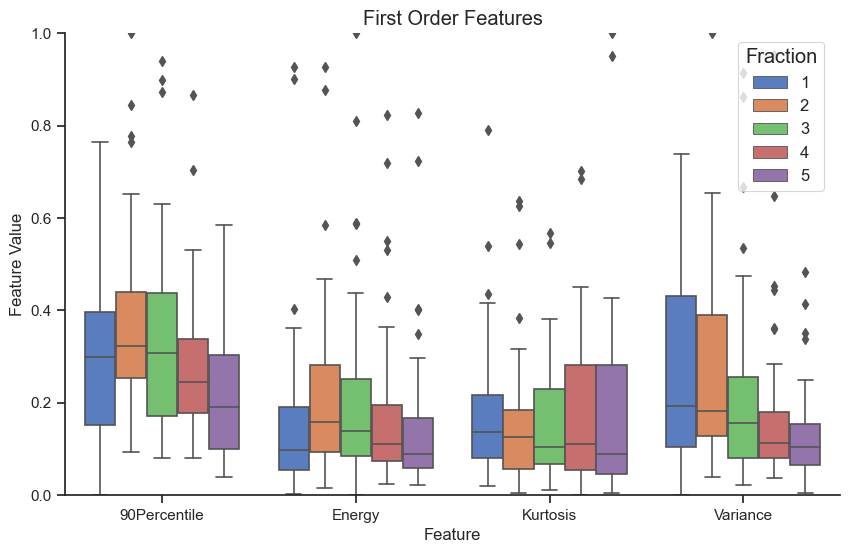

In [63]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_context("paper", font_scale=1.5)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}

sns.boxplot(x="Feature", y="RS", hue="Fraction", data=df_plt, palette="muted", ax=ax, showfliers=True)
ax.set_xlabel('Feature')
ax.set_ylabel('Feature Value')
ax.set_title('First Order Features')
ax.legend(loc='upper right', title='Fraction', bbox_to_anchor=(0.99, 1), fontsize='small')
ax.set_ylim(0, 1)

sns.set_theme(style="ticks", rc=custom_params)
fig.savefig('Plots/FeatureBoxPlot-FO.png', dpi=300)

In [19]:
for group in df_all['Group'].unique()[0:1]:
    group = 'firstorder'
    df_grp = df_all[df_all['Group'] == group]
    fts_1 = ['Median', 'Variance', '10Percentile', '90Percentile']
df_grp.head()
    # df_bar = df_grp[df_grp['Fraction']!=1]
    # df_bar = df_grp[df_grp['Feature'].isin(fts_1)]
    # fig = plt.figure(figsize=(15, 6))
    # sns.set_style("whitegrid")
    # sns.set_context("paper", font_scale=1.5)
    # ax = fig.add_subplot(111)
    # sns.boxplot(x='Feature', y='RS', hue='Fraction', data=df_bar, ax=ax, palette='muted', showfliers=False)
    # ax.set_title("First Order Statistics", fontsize=18)
    # ax.set_ylabel('Feature Value', fontsize=16)
    # ax.set_xlabel('Feature', fontsize=16)
    # ax.tick_params(axis='both', which='major', labelsize=14)
    # # ax.set_ylim(-2, 2)
    # ax.legend(loc='upper right', title='Fraction', fontsize=10, title_fontsize=12, fancybox=True, facecolor='grey', framealpha=0.2, edgecolor='black')

    # ax.set_ylim(-2, 2)
    # # plt.tight_layout()


,Unnamed: 0,Unnamed: 0.1,PatID,Fraction,Contour,ContourType,Feature,FeatureValue,RS,Group
14,14,14,1642,1,RP,Manual,firstorder_10Percentile,2.000000e+01,0.241935,firstorder
15,15,15,1642,1,RP,Manual,firstorder_90Percentile,1.160000e+02,0.375839,firstorder
16,16,16,1642,1,RP,Manual,firstorder_Energy,1.471706e+08,0.246320,firstorder
17,17,17,1642,1,RP,Manual,firstorder_Entropy,2.591275e+00,0.616846,firstorder
18,18,18,1642,1,RP,Manual,firstorder_InterquartileRange,4.600000e+01,0.367647,firstorder
